In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
movies = pd.read_csv('movies.dat',sep = "::", names = ['MovieID', 'Title', 'Genres'])

In [3]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings = pd.read_csv('ratings.dat', sep = "::", names = ['UserID','MovieID', 'Rating', 'Timestamp'])

In [5]:
ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [6]:
users = pd.read_csv('users.dat', sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'])
users.head(3)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [7]:
movies.shape, users.shape, ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

In [8]:
users.Occupation.value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

In [9]:
movie_ratings = pd.merge(movies, ratings, on = "MovieID",)
movie_ratings.shape

(1000209, 6)

In [10]:
movie_ratings.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496


In [11]:
MasterData = pd.merge(movie_ratings, users, on = "UserID")
MasterData.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067


In [12]:
Prjdata=MasterData[:6000]

Text(0.5, 0, 'age')

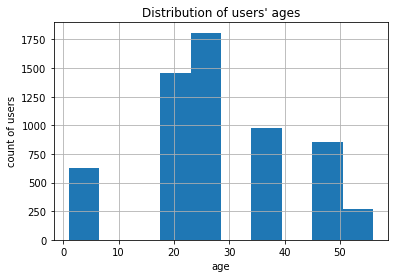

In [13]:
Prjdata.Age.hist()
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

# Ans 1 Above histogram shows users agewise distribution

In [14]:
MasterData.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
import re

In [16]:
title=MasterData.iloc[0].Title
title

'Toy Story (1995)'

In [17]:
re.search("Toy Story", title)!=None

True

In [18]:
def fn(f):
    return re.search("Toy Story".lower(),f.lower())!=None
fn(title)

True

In [19]:
MasterData["Title"].apply(fn)

0           True
1          False
2          False
3          False
4          False
           ...  
1000204    False
1000205    False
1000206    False
1000207    False
1000208    False
Name: Title, Length: 1000209, dtype: bool

In [20]:
toystory= MasterData[MasterData["Title"].apply(fn)]
toystory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [21]:
toystory_df = MasterData.filter(items=['Title','Rating'])
toystory_df.set_index('Title',inplace=True)

(3662, 1)
5    1544
4    1413
3     559
2     105
1      41
Name: Rating, dtype: int64


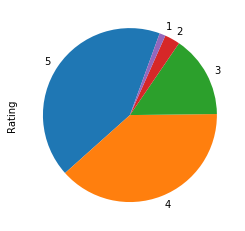

In [22]:
r = toystory_df.filter(like='Toy Story',axis=0)
print(r.shape)
print(pd.value_counts(r.Rating))
pd.value_counts(r.Rating).plot(kind='pie',startangle=70,figsize=(10,4))

# Ans 2 Toy story rating observation, out of 3662 , 1544 has rated 5 ratings

In [23]:
most_rated25 = MasterData.groupby(["MovieID","Title"]).size().sort_values(ascending=False)[:25]
most_rated25

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

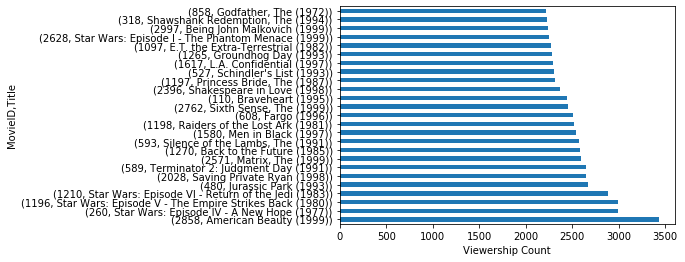

In [24]:
plt.ylabel("Title")
plt.xlabel("Viewership Count")
most_rated25.plot(kind="barh")

# Ans 3: Top 25 Movies as per Viewership ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


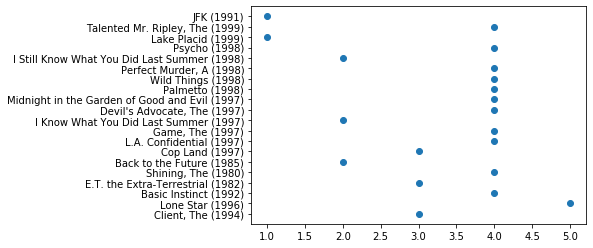

In [25]:
usr=MasterData.loc[MasterData.UserID==2696]
plt.scatter(y=usr.Title, x=usr.Rating)
usr

# Ans 4 Ratings of all movies for user id 2696

# Feature Engineering

In [26]:
MasterData.Genres=MasterData.Genres.str.split("|")
MasterData.Genres.head()

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
3         [Action, Adventure, Fantasy, Sci-Fi]
4                                 [Drama, War]
Name: Genres, dtype: object

In [37]:
Pdata=MasterData[:7000]
Pdata.iloc[0].Genres + Pdata.iloc[1].Genres

['Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Musical',
 'Romance']

In [38]:
Pdata.Genres[:2]

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
Name: Genres, dtype: object

In [39]:
x = []
for rn in range(len(Pdata)):
    x = x+Pdata.iloc[rn].Genres

In [40]:
print(x)

['Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Drama', 'War', "Children's", 'Drama', 'Animation', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Animation', "Children's", 'Musical', 'Crime', 'Drama', 'Thriller', 'Animation', "Children's", 'Musical', 'Animation', 'Animation', 'Comedy', 'Thriller', 'Animation', "Children's", 'Musical', 'Musical', 'Romance', 'Adventure', "Children's", 'Drama', 'Musical', 'Musical', 'Animation', "Children's", 'Musical', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Musical', "Children's", 'Drama', 'Fantasy', 'Sci-Fi', 'Drama', 'Action', 'Adventure', 'Comedy', 'Romance', 'Drama', 'Drama', 'Comedy', 'Sci-Fi', 'Action', 'Adventure', 'Drama', 'Drama', 'Adventure', 'Animation', "Children's", 'Comedy', 'Musical', 'Drama', 'Romance', 'Drama', 'Animation', "Children's", 'Drama', 'Drama', 'Animation', "Children's", 'Ac

In [41]:
unique_genres = list(set(x))
print(unique_genres)

['Drama', 'Adventure', 'Mystery', 'Documentary', "Children's", 'Sci-Fi', 'Crime', 'War', 'Horror', 'Animation', 'Musical', 'Action', 'Fantasy', 'Comedy', 'Thriller', 'Film-Noir', 'Western', 'Romance']


In [42]:
unique_genres = pd.Series(unique_genres)

In [43]:
df = pd.DataFrame()
for row in Pdata.Genres:
    a = unique_genres.isin(row) #is in method of series can be applied
    df = df.append(a, ignore_index = True)
df[:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.columns = unique_genres
df.head(3)

,Drama,Adventure,Mystery,Documentary,Children's,Sci-Fi,Crime,War,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western,Romance
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
Pdata = pd.concat((Pdata, df), axis = 1)

In [47]:
Pdata.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western,Romance
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
Pdata.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-Code', 'Drama', 'Adventure', 'Mystery',
       'Documentary', 'Children's', 'Sci-Fi', 'Crime', 'War', 'Horror',
       'Animation', 'Musical', 'Action', 'Fantasy', 'Comedy', 'Thriller',
       'Film-Noir', 'Western', 'Romance'],
      dtype='object')

In [49]:
final_data = Pdata.drop(["MovieID", "Title", "Genres", "UserID", "Timestamp", "Zip-Code"], axis = 1)

In [50]:
final_data.head(3)

,Rating,Gender,Age,Occupation,Drama,Adventure,Mystery,Documentary,Children's,Sci-Fi,...,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western,Romance
0,5,F,1,10,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5,F,1,10,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,F,1,10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
final_data.Gender[final_data.Gender == 'M'] = 1
final_data.Gender[final_data.Gender == 'F'] = 2
print(final_data) 

      Rating Gender  Age  Occupation  Drama  Adventure  Mystery  Documentary  \
0          5      2    1          10    0.0        0.0      0.0          0.0   
1          5      2    1          10    0.0        0.0      0.0          0.0   
2          5      2    1          10    1.0        0.0      0.0          0.0   
3          4      2    1          10    0.0        1.0      0.0          0.0   
4          5      2    1          10    1.0        0.0      0.0          0.0   
...      ...    ...  ...         ...    ...        ...      ...          ...   
6995       5      1   35           7    0.0        1.0      0.0          0.0   
6996       4      1   35           7    0.0        1.0      0.0          0.0   
6997       5      1   35           7    0.0        1.0      0.0          0.0   
6998       5      1   35           7    0.0        1.0      0.0          0.0   
6999       5      1   35           7    0.0        1.0      0.0          0.0   

      Children's  Sci-Fi  ...  Horror  

In [126]:
y = final_data['Rating']
x= final_data.iloc[:, 1:]

In [127]:
final_data.var()

Rating          1.219257
Gender          0.236110
Age             1.984967
Occupation     15.285254
Drama           0.200108
Adventure       0.141779
Mystery         0.030177
Documentary     0.004126
Children's      0.132468
Sci-Fi          0.136835
Crime           0.058540
War             0.056031
Horror          0.057538
Animation       0.089899
Musical         0.066581
Action          0.198175
Fantasy         0.052618
Comedy          0.240262
Thriller        0.137890
Film-Noir       0.011858
Western         0.018916
Romance         0.141309
dtype: float64

In [128]:
print(x.shape)
print(y.shape)

(7000, 21)
(7000,)


In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [95]:
selector = SelectKBest(chi2, k = 3)

In [96]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('select_k_best', selector), 
                 ('knn', knn)])

In [97]:
pipe.get_params()

{'memory': None,
 'steps': [('select_k_best',
   SelectKBest(k=3, score_func=<function chi2 at 0x000001C7866A4828>)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False,
 'select_k_best': SelectKBest(k=3, score_func=<function chi2 at 0x000001C7866A4828>),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'select_k_best__k': 3,
 'select_k_best__score_func': <function sklearn.feature_selection.univariate_selection.chi2(X, y)>,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [98]:
param_grid = [
  {'select_k_best__k': [1, 4, 3, 5],
   'knn__n_neighbors': [3, 5, 6,9]}
  ]

In [99]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=5,  
                  refit=False)

In [100]:
final_data.head(1)

,Rating,Gender,Age,Occupation,Drama,Adventure,Mystery,Documentary,Children's,Sci-Fi,...,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western,Romance
0,5,2,1,10,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
y = final_data.Rating.values
x= final_data.iloc[:, 1:].values

In [103]:
gs = gs.fit(x,y)

In [104]:
gs.best_params_

{'knn__n_neighbors': 6, 'select_k_best__k': 1}

In [106]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'knn__n_neighbors': 6, 'select_k_best__k': 1}


In [108]:
print('Best score:', gs.best_score_)

Best score: 0.231


In [109]:
import seaborn as sns

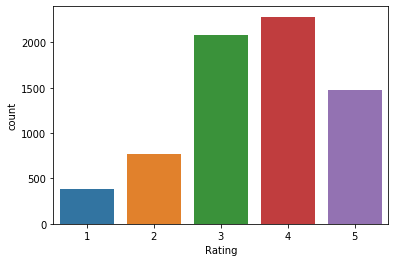

In [110]:
sns.countplot(final_data['Rating'])

#as per above chart we can see it is an unblanced classification problem

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le=LabelEncoder()

In [116]:
for i in final_data.columns:
    final_data[i]=le.fit_transform(final_data[i])

In [129]:
final_data.head()

,Rating,Gender,Age,Occupation,Drama,Adventure,Mystery,Documentary,Children's,Sci-Fi,...,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western,Romance
0,4,1,0,7,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,4,1,0,7,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
2,4,1,0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,7,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,4,1,0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
x=final_data[final_data.columns[:-1]]
y=final_data['Rating']

In [120]:
pd.value_counts(y)

3    2284
2    2087
4    1480
1     766
0     383
Name: Rating, dtype: int64

In [131]:
x.head(2)

,Rating,Gender,Age,Occupation,Drama,Adventure,Mystery,Documentary,Children's,Sci-Fi,...,War,Horror,Animation,Musical,Action,Fantasy,Comedy,Thriller,Film-Noir,Western
0,4,1,0,7,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,4,1,0,7,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [141]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
pred=logreg.predict(x_test)

In [150]:
logreg.score(x_test,y_test)

1.0

In [151]:
logreg.score(x_train,y_train)

1.0

# Ans:4 Logistic Regression model gives good accuracy and its is best to predict movies raiting